## Calculate minimum slope from a DEM

In [27]:
from arcpy.sa import Raster, RasterCellIterator
from arcpy.ia import Render

In [28]:
dem = Raster(r'C:\sample_data\elev.tif')
cell_x = dem.meanCellHeight
cell_y = dem.meanCellWidth
raster_info = dem.getRasterInfo()

In [29]:
# Set the output pixel type to be float 32 
raster_info.setPixelType('F32')
min_slope = Raster(raster_info)

In [30]:
with RasterCellIterator({'rasters':[dem, min_slope]}) as rci:
    for r,c in rci:
        slopes = []
        # Iterate through 8 neighbors 
        for x,y in [(-1,-1),(-1,0),(1,0),(0,-1),(0,1),(1,1),(-1,1),(1,-1)]:
            # Calculate the slope from center cell to each neighbor
            slope = abs(dem[r,c]-dem[r+x,c+y])/math.sqrt(cell_x**2+cell_y**2)
            # Add all the slope values to a list
            slopes.append(slope)
        # Assign the minimum slope to the output cell value 
        min_slope[r,c] = min(slopes)
min_slope.save(r'C:\output\min_slope.tif')

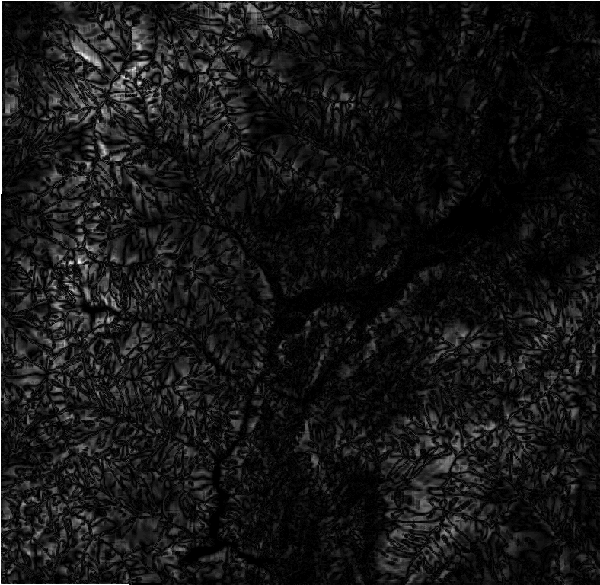

In [41]:
Render(min_slope, colormap="Black to White")